In [27]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')


import warnings
warnings.filterwarnings("ignore")

In [28]:
df_train = pd.read_csv("./bike-sharing-demand/train.csv")
df_test = pd.read_csv("./bike-sharing-demand/test.csv")
display(df_train.head())
display(df_test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
# 특성값
'''
Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
'''

'\nData Fields\ndatetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

In [30]:
# Competetion 성능 평가 방법은 RMSEL(Root Mean Square Log Error)

from sklearn.metrics import mean_squared_error, mean_absolute_error # MSE, MAE 

# log 변환 시 NaN 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# RMSE
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3F}, MAE : {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [31]:
df_train.shape,df_test.shape

((10886, 12), (6493, 9))

In [32]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.

In [33]:
df_train.drop(columns=['casual','registered'],inplace=True)
print(df_train.shape,df_test.shape)
display(df_train.head())
display(df_test.head())

(10886, 10) (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [34]:
# 중복값 확인
df_train[df_train.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count


In [35]:
# 결측치 확인
print(df_train.isnull().sum())
print(df_test.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


<AxesSubplot:xlabel='count', ylabel='Count'>

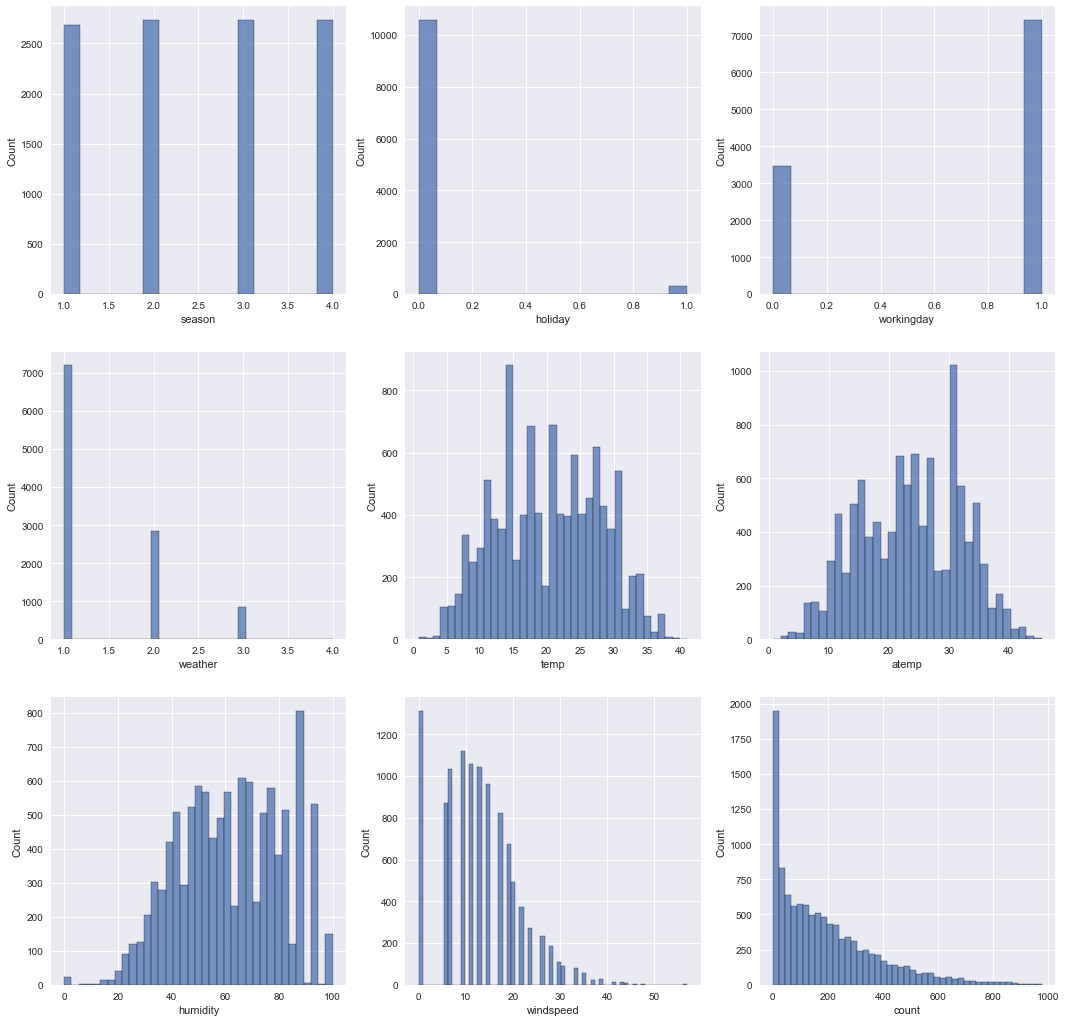

In [36]:
# 각각의 feature 값들의 빈도수 분포도 확인
figure,ax= plt.subplots(nrows=3,ncols=3)
figure.set_size_inches(18,18)

sns.histplot(df_train['season'],ax=ax[0][0])
sns.histplot(df_train['holiday'],ax=ax[0][1])
sns.histplot(df_train['workingday'],ax=ax[0][2])
sns.histplot(df_train['weather'],ax=ax[1][0])
sns.histplot(df_train['temp'],ax=ax[1][1])
sns.histplot(df_train['atemp'],ax=ax[1][2])
sns.histplot(df_train['humidity'],ax=ax[2][0])
sns.histplot(df_train['windspeed'],ax=ax[2][1])
sns.histplot(df_train['count'],ax=ax[2][2])

In [39]:
# datetime을 datetime형으로 변환
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [40]:
# datetime을 년,월,일,시,분,초 값으로 나누어서 확인
df_train['year'] = df_train.datetime.dt.year
df_train['month'] = df_train.datetime.dt.month
df_train['day'] = df_train.datetime.dt.day
df_train['hour'] = df_train.datetime.dt.hour
df_train['minute'] = df_train.datetime.dt.minute
df_train['second'] = df_train.datetime.dt.second
df_train['dayofweek'] = df_train.datetime.dt.dayofweek

df_test['year'] = df_test.datetime.dt.year
df_test['month'] = df_test.datetime.dt.month
df_test['day'] = df_test.datetime.dt.day
df_test['hour'] = df_test.datetime.dt.hour
df_test['minute'] = df_test.datetime.dt.minute
df_test['second'] = df_test.datetime.dt.second
df_test['dayofweek'] = df_test.datetime.dt.dayofweek


display(df_train.head(10))
display(df_test.head(10))

print(df_train.shape,df_test.shape)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5,0,0,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6,0,0,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7,0,0,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8,0,0,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9,0,0,5


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5,0,0,3
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6,0,0,3
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7,0,0,3
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8,0,0,3
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9,0,0,3


(10886, 17) (6493, 16)


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

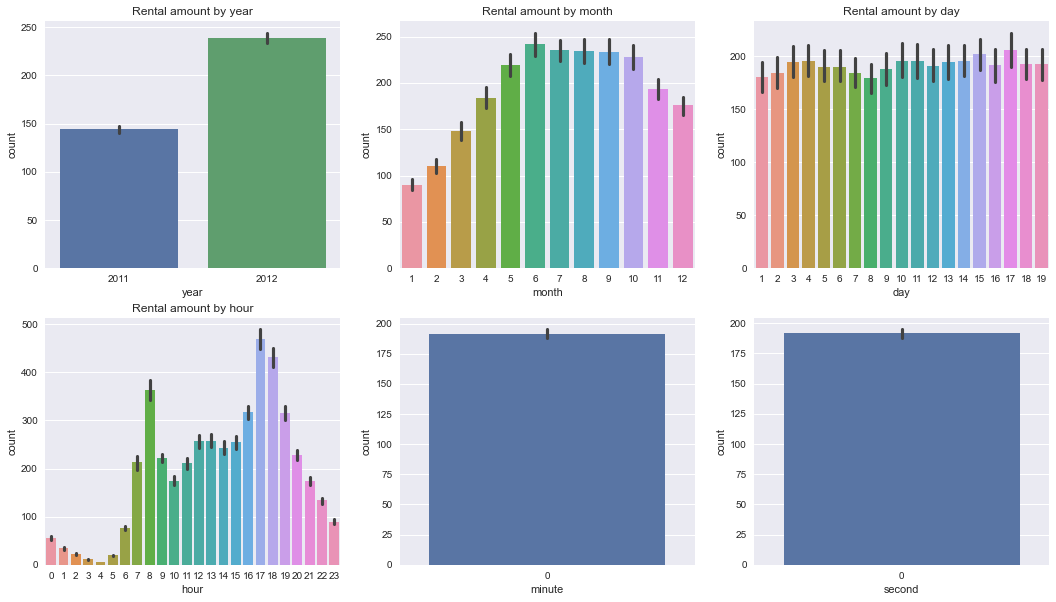

In [41]:
# datetime에 따른 count 값 시각화
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,10)

sns.barplot(data=df_train,x='year',y='count',ax=ax1)
sns.barplot(data=df_train,x='month',y='count',ax=ax2)
sns.barplot(data=df_train,x='day',y='count',ax=ax3)
sns.barplot(data=df_train,x='hour',y='count',ax=ax4)
sns.barplot(data=df_train,x='minute',y='count',ax=ax5)
sns.barplot(data=df_train,x='second',y='count',ax=ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

In [42]:
# 필요없는 속성 삭제
df_train.drop(columns=['datetime','day','minute','second'],inplace=True)
df_test.drop(columns=['datetime','day','minute','second'],inplace=True)

In [43]:
display(df_train.head())
display(df_test.head())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


<AxesSubplot:xlabel='hour', ylabel='count'>

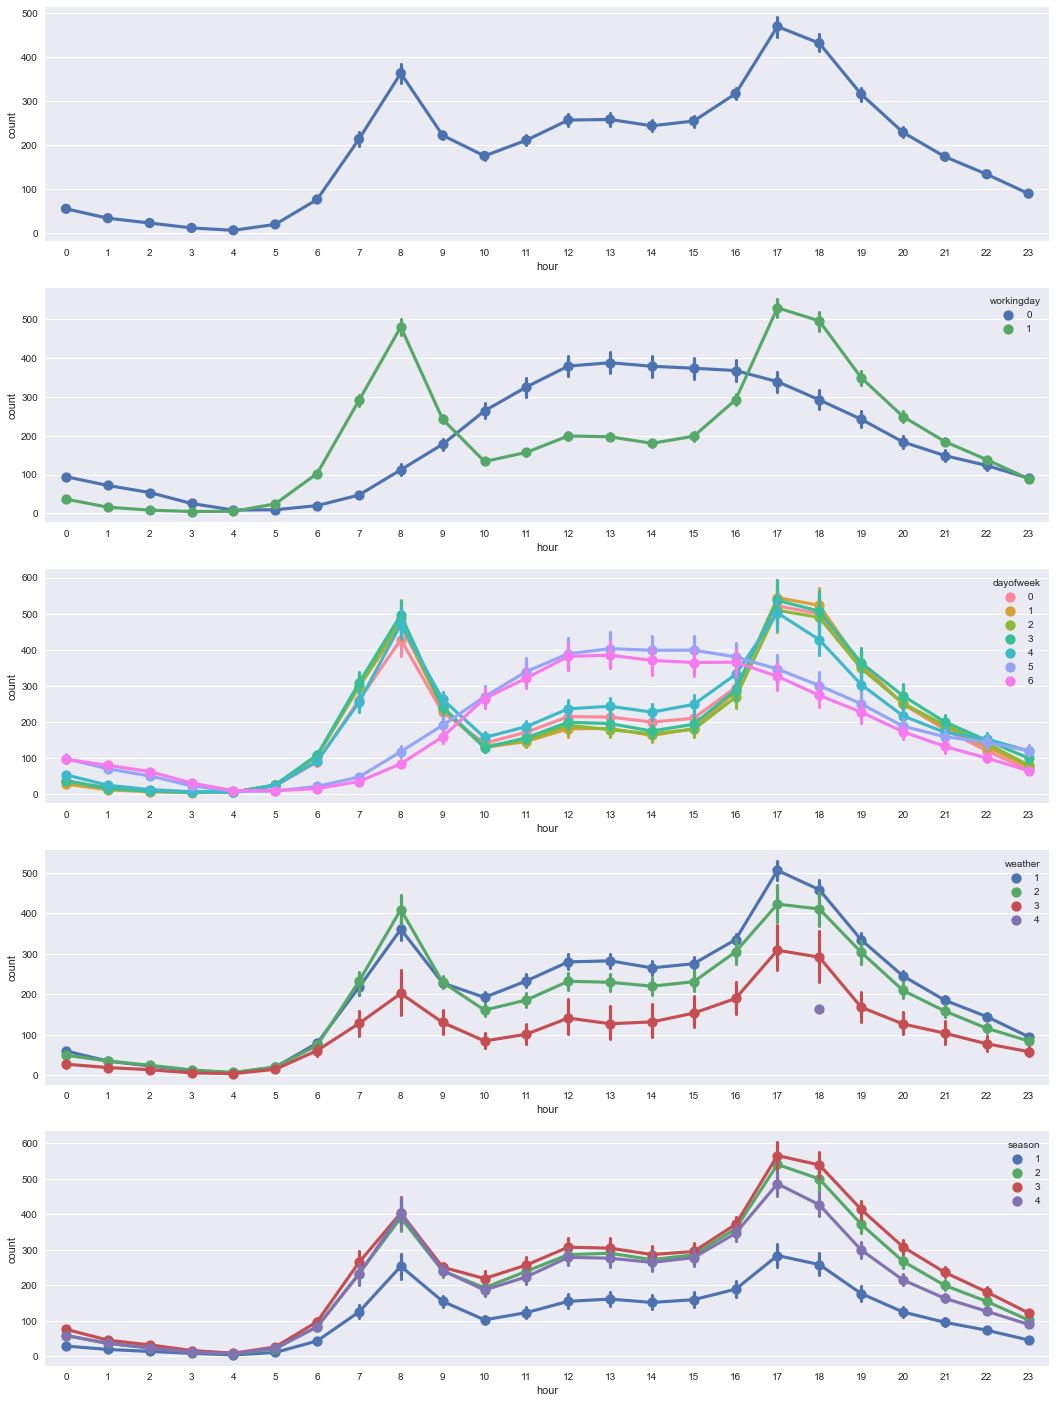

In [44]:
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=df_train, x="hour", y="count", ax=ax1)
# x, y, hue names of variables in data or vector data, optional
sns.pointplot(data=df_train, x="hour", y="count",hue='workingday' ,ax=ax2)
sns.pointplot(data=df_train, x="hour", y="count",hue='dayofweek' ,ax=ax3)
sns.pointplot(data=df_train, x="hour", y="count",hue='weather' ,ax=ax4)
sns.pointplot(data=df_train, x="hour", y="count",hue='season' ,ax=ax5)

In [49]:
# 모델 평가
# 선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target = df_train['count']
features = df_train.drop(columns=['count'])

train_input,test_input,train_target,test_target = train_test_split(features,target,random_state=42)

lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

# 성능평가
pred = lr.predict(test_input)
evaluate_regr(test_target,pred)

0.38963703691797547
0.3874571239647686
RMSLE : 1.168, RMSE : 141.774, MAE : 105.499


In [50]:
# 이상치를 제거 후 다시 성능 평가

target = df_train['count']
features = df_train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)

lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

# 성능평가
pred = lr.predict(test_input)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)

0.4900086069035322
0.4802876919224366
RMSLE : 1.020, RMSE : 161.948, MAE : 108.760


In [95]:
from sklearn.preprocessing import PolynomialFeatures

target = df_train['count']
features = df_train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)


lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# 성능평가
pred = lr.predict(test_poly)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)


(8164, 91)
0.6414653711993258
0.6300901941426389
RMSLE : 0.860, RMSE : 123.838, MAE : 75.671


In [96]:
# 스케일 적용
from sklearn.preprocessing import StandardScaler

target = df_train['count']
features = df_train.drop(columns=['count'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lr = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

# 성능평가
pred = lr.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)


0.6414451892939077
0.6301020856550491
RMSLE : 0.860, RMSE : 123.738, MAE : 75.667


In [59]:
# 원 핫 인코딩 적용

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lr = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

# 성능평가
pred = lr.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)


0.9615606614924026
0.9517541915862963
RMSLE : 0.311, RMSE : 46.769, MAE : 28.755


In [60]:
# 릿지 회귀
from sklearn.linear_model import Ridge

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

# 성능평가
pred = ridge.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.9619395720876455
0.9521673520394763
RMSLE : 0.309, RMSE : 45.784, MAE : 28.355


In [61]:
# 라쏘 회귀

from sklearn.linear_model import Lasso

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

# 성능평가
pred = lasso.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.0
-0.00010784435890554
RMSLE : 1.414, RMSE : 204.550, MAE : 142.635


In [68]:
# 의사 결정 트리 회귀 
from sklearn.tree import DecisionTreeRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

dt = DecisionTreeRegressor()
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

# 성능평가
pred = dt.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.999997381841576
0.8896250792941953
RMSLE : 0.470, RMSE : 67.869, MAE : 39.889


In [69]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

rf = RandomForestRegressor()
rf.fit(train_scaled,train_target)
print(rf.score(train_scaled,train_target))
print(rf.score(test_scaled,test_target))

# 성능평가
pred = rf.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.9923940881595574
0.9476607000779634
RMSLE : 0.324, RMSE : 44.440, MAE : 27.564


In [70]:
# 엑스트라 트리 

from sklearn.ensemble import ExtraTreesRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

et = ExtraTreesRegressor()
et.fit(train_scaled,train_target)
print(et.score(train_scaled,train_target))
print(et.score(test_scaled,test_target))

# 성능평가
pred = et.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.999997381841576
0.9475158758455671
RMSLE : 0.324, RMSE : 40.941, MAE : 25.180


In [72]:
# 그레이디언트 부스팅

from sklearn.ensemble import GradientBoostingRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

gb = GradientBoostingRegressor()
gb.fit(train_scaled,train_target)
print(gb.score(train_scaled,train_target))
print(gb.score(test_scaled,test_target))

# 성능평가
pred = gb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.9183763437771242
0.9099578477012672
RMSLE : 0.424, RMSE : 85.876, MAE : 53.433


In [91]:
# 히스토그램 기반 그래디언트

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


hgb = HistGradientBoostingRegressor()
hgb.fit(train_scaled,train_target)
print(hgb.score(train_scaled,train_target))
print(hgb.score(test_scaled,test_target))

# 성능평가
pred = hgb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.973051066692716
0.9560133973984682
RMSLE : 0.297, RMSE : 42.892, MAE : 26.398


In [74]:
# xgboost 

from xgboost import XGBRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

xgb = XGBRegressor()
xgb.fit(train_scaled,train_target)
print(xgb.score(train_scaled,train_target))
print(xgb.score(test_scaled,test_target))

# 성능평가
pred = xgb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.9876329748107013
0.9479585996725146
RMSLE : 0.323, RMSE : 46.443, MAE : 28.096


In [75]:
# LightGBM 

from lightgbm import LGBMRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lgb = LGBMRegressor()
lgb.fit(train_scaled,train_target)
print(lgb.score(train_scaled,train_target))
print(lgb.score(test_scaled,test_target))

# 성능평가
pred = lgb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.9730110382834807
0.956222528013629
RMSLE : 0.296, RMSE : 42.785, MAE : 26.472


In [76]:
# 히스토그램 그래디언트와 LightGBM 으로 측정

# LightGBM 

from lightgbm import LGBMRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])

target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lgb = LGBMRegressor()
lgb.fit(train_scaled,train_target)
print(lgb.score(train_scaled,train_target))
print(lgb.score(test_scaled,test_target))

# 성능평가
pred = lgb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)



0.9730110382834807
0.956222528013629
RMSLE : 0.296, RMSE : 42.785, MAE : 26.472


In [81]:
# 히스토그램 그래디언트와 LightGBM 으로 측정

# LightGBM 

from lightgbm import LGBMRegressor

target = df_train['count']
features = df_train.drop(columns=['count'])

features_ohe = pd.get_dummies(features,columns=['year','month','hour','holiday','workingday','season','weather'])
test_features_ohe = pd.get_dummies(df_test,columns=['year','month','hour','holiday','workingday','season','weather'])


target_log = np.log1p(target)

train_input,test_input,train_target,test_target = train_test_split(features_ohe,target_log,random_state=42)

# 사이킷런 변환기 적용
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
df_test_poly = poly.transform(test_features_ohe)

# 특성 스케일 적용
ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
df_test_scaled = ss.transform(df_test_poly)

lgb = LGBMRegressor()
lgb.fit(train_scaled,train_target)
print(lgb.score(train_scaled,train_target))
print(lgb.score(test_scaled,test_target))

# 성능평가
pred = lgb.predict(test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
evaluate_regr(test_target_exp,pred_exp)





0.9730110382834807
0.956222528013629
RMSLE : 0.296, RMSE : 42.785, MAE : 26.472


In [89]:
# 성능평가
pred = lgb.predict(df_test_scaled)

pred.shape

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_exp = np.expm1(pred)
# evaluate_regr(test_target_exp,pred_exp)

pred_exp

array([ 11.64808021,   5.60473977,   3.1920575 , ..., 116.0557629 ,
        76.24832752,  43.45089399])

In [90]:
submit = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submit['count'] = pred_exp
submit.to_csv("./results.csv",index=False)

In [ ]:
# 제출 결과 : 0.39414

In [92]:
# 히스토그램 그래디언트
pred_hgb = hgb.predict(df_test_scaled)

# 다시 지수로 바꾸기
test_target_exp = np.expm1(test_target)
pred_hgb_exp = np.expm1(pred_hgb)
# evaluate_regr(test_target_exp,pred_exp)

pred_hgb_exp

array([ 10.97736172,   5.00541673,   3.02420632, ..., 121.72194515,
        82.25102444,  46.21395623])

In [93]:
submit = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submit['count'] = pred_hgb_exp
submit.to_csv("./results.csv",index=False)

In [94]:
# 제출 결과 : 0.39403 ,/ 180등